In [1]:
from utils import load_data, visualize_point
import numpy as np
import pickle
import re
import click
from systems.acrobot import Acrobot
from matplotlib import pyplot as plt

In [77]:
from utils import load_data
env_id = 0
system = 'acrobot_obs'
traj_id = 0
path_dict = load_data(system, env_id, traj_id)
path_dict['path']/np.array([np.pi, np.pi, 6, 6]),path_dict['start_goal']/np.array([np.pi, np.pi, 6, 6])

(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.07836297, -0.17056428,  0.18107719, -0.41303746],
        [ 0.00786703, -0.1493748 , -0.26408768,  0.42104782],
        [-0.28368059,  0.47980372, -0.06044505,  0.41753025],
        [ 0.33609031, -0.84215921, -0.64869047,  0.09831128],
        [-0.37911599, -0.458542  , -0.33615473,  0.28004222],
        [-0.44130319, -0.40049396, -0.17900291,  0.20693734],
        [ 0.51785798,  0.78154969,  0.59162705, -0.50202684],
        [ 0.77845684,  0.52050304,  0.10149964, -0.12560298]]),
 array([[0.        , 0.        , 0.        , 0.        ],
        [0.79808112, 0.48041781, 0.        , 0.        ]]))

In [73]:
# setup = 'default_norm'
setup = 'norm_nodiff_noaug_20step2e-2'

data_fn = 'acrobot_obs_path_data.npy'
gt_fn = 'acrobot_obs_gt.npy'

data = np.load('{}/{}'.format(setup, data_fn))[:, 1:]
gt = np.load('{}/{}'.format(setup, gt_fn))

start_id = 0
end_id = 18
# start_id = 9
# end_id = 18
data[start_id:end_id, :4], gt[start_id:end_id]

(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.07836297, -0.17056428,  0.18107719, -0.41303746],
        [ 0.09546804, -0.27283804, -0.14841365,  0.17069239],
        [ 0.00786703, -0.1493748 , -0.26408768,  0.42104782],
        [-0.23437483,  0.32172167, -0.2347524 ,  0.59230881],
        [-0.28368059,  0.47980372, -0.06044505,  0.41753025],
        [-0.07177446,  0.38421764,  0.57210981, -0.71639247],
        [ 0.417467  , -0.32715804,  0.49910345, -0.80120925],
        [ 0.57986387, -0.75031567, -0.1168483 , -0.330591  ],
        [ 0.33609031, -0.84215921, -0.64869047,  0.09831128],
        [-0.22691097, -0.58111602, -0.61508483,  0.46554859],
        [-0.37911599, -0.458542  , -0.33615473,  0.28004222],
        [-0.44130319, -0.40049396, -0.17900291,  0.20693734],
        [-0.27153322, -0.59736078,  0.6342373 , -0.64537038],
        [ 0.35718469,  0.90570865,  0.7805312 , -0.56781303],
        [ 0.51785798,  0.78154969,  0.59162705, -0.50202684],
        

<IPython.core.display.Javascript object>


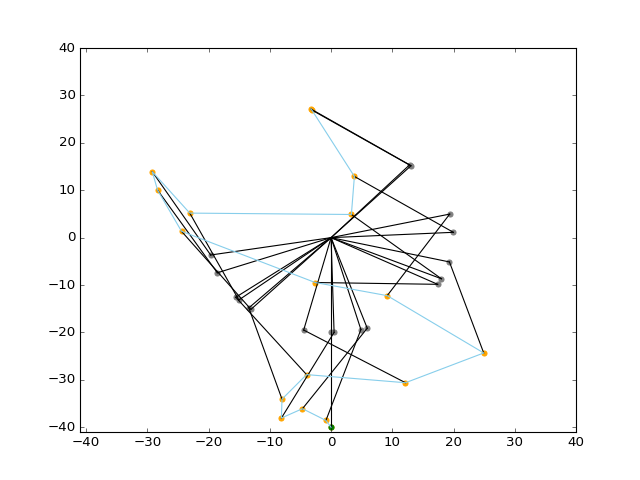

(-41, 40)

In [78]:
%matplotlib notebook
datas = data[start_id:end_id, :4]*np.array([np.pi, np.pi, 6, 6])
gts = gt[start_id:end_id]*np.array([np.pi, np.pi, 6, 6])
endeff = []
node1 = []
for i in range(gts.shape[0]):
    ex1, ey1, ex2, ey2 = visualize_point(datas[i, :4])#gts[i, :])
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='black')
    plt.plot([ex1, ex2], [ey1, ey2], color='black')

    
endeff = np.array(endeff)
node1 = np.array(node1)
plt.plot(endeff[:,0], endeff[:,1], color='skyblue')

plt.scatter(endeff[0, 0], endeff[0, 1], color='green')
plt.xlim(-41, 40)
plt.ylim(-41, 40)


In [79]:
gt.std(axis=0)

array([0.43221765, 0.55450666, 0.39171543, 0.45286436])

In [80]:
data[:,].std(axis=0)

array([0.37824269, 0.54871857, 0.39171543, 0.45286436, 0.77439423,
       0.33954737, 0.        , 0.        ])

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


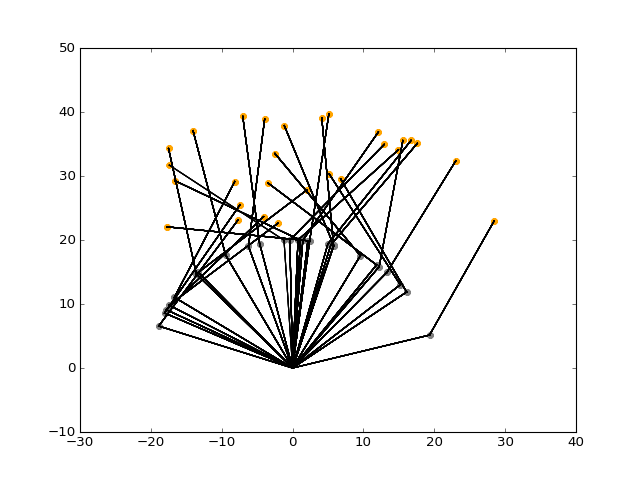

In [83]:
%matplotlib 

d = data[:500, 4:]
endeff = []
node1 = []
for i in range(d.shape[0]):
    ex1, ey1, ex2, ey2 = visualize_point(d[i, :4] * np.array([np.pi, np.pi, 6,6]))#gts[i, :]
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='black')
    plt.plot([ex1, ex2], [ey1, ey2], color='black')


<IPython.core.display.Javascript object>


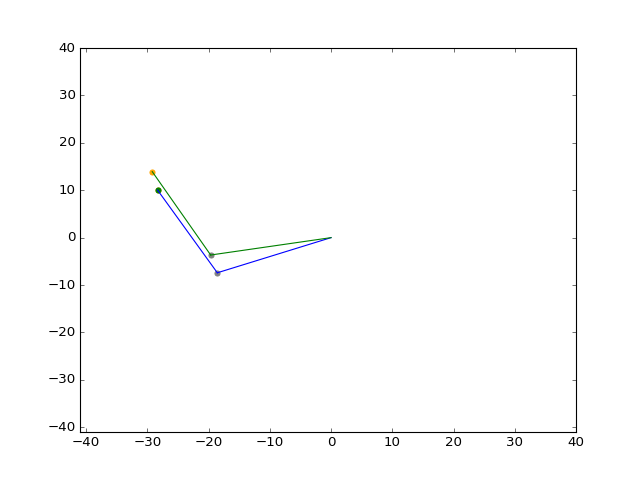

(-41, 40)

In [89]:
%matplotlib notebook
node_id = 11

datas = data[node_id:node_id+1, :4]*np.array([np.pi, np.pi, 6, 6])
gts = gt[node_id:node_id+1]*np.array([np.pi, np.pi, 6, 6])
endeff = []
node1 = []
for i in range(gts.shape[0]):
    ex1, ey1, ex2, ey2 = visualize_point(datas[i, :4])#gts[i, :])
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='blue')
    plt.plot([ex1, ex2], [ey1, ey2], color='blue')
    
    ex1, ey1, ex2, ey2 = visualize_point(gts[i, :])#
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='green')
    plt.plot([ex1, ex2], [ey1, ey2], color='green')

    
endeff = np.array(endeff)
node1 = np.array(node1)
plt.plot(endeff[:,0], endeff[:,1], color='skyblue')

plt.scatter(endeff[0, 0], endeff[0, 1], color='green')
plt.xlim(-41, 40)
plt.ylim(-41, 40)


In [8]:
data[node_id:node_id+1, :4],gt[node_id:node_id+1]

(array([[0., 0., 0., 0.]]),
 array([[ 0.07836297, -0.17056428,  0.18107719, -0.41303746]]))